In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
input_path='./01_数据input/'

In [6]:
df=pd.read_excel(input_path+'法定存款准备金率.xlsx',header=1)[:-6]
df=df.sort_values('公布时间')
df=df.iloc[2:]
df

,公布时间,生效时间,调整前,调整后,调整幅度,调整前.1,调整后.1,调整幅度.1
23,2010年05月02日,2010年05月10日,16.5,17.0,0.5,14.5,15.0,0.5
22,2010年11月10日,2010年11月16日,17.0,17.5,0.5,15.0,15.5,0.5
21,2010年11月19日,2010年11月29日,17.5,18.0,0.5,15.5,16.0,0.5
20,2010年12月10日,2010年12月20日,18.0,18.5,0.5,16.0,16.5,0.5
19,2011年01月14日,2011年01月20日,18.5,19.0,0.5,16.5,16.5,0.0
18,2011年02月18日,2011年02月24日,19.0,19.5,0.5,16.5,17.0,0.5
17,2011年03月18日,2011年03月25日,19.5,20.0,0.5,17.0,18.0,1.0
16,2011年04月17日,2011年04月21日,20.0,20.5,0.5,18.0,18.5,0.5
15,2011年05月12日,2011年05月18日,20.5,21.0,0.5,18.5,19.0,0.5
14,2011年06月14日,2011年06月20日,21.0,21.5,0.5,19.0,19.5,0.5


In [7]:
RRR_time=df['公布时间'].apply(lambda x:datetime.datetime.strptime(x,'%Y年%m月%d日'))
RRR_time

23   2010-05-02
22   2010-11-10
21   2010-11-19
20   2010-12-10
19   2011-01-14
18   2011-02-18
17   2011-03-18
16   2011-04-17
15   2011-05-12
14   2011-06-14
13   2011-11-30
12   2012-02-18
11   2012-05-12
10   2015-02-04
9    2015-04-19
8    2015-08-25
7    2015-10-23
6    2016-02-29
5    2018-04-17
4    2018-06-24
3    2018-10-07
2    2019-01-04
1    2019-09-06
0    2020-01-01
Name: 公布时间, dtype: datetime64[ns]

In [9]:
irs_new=pd.read_excel(input_path+'IRS_new.xlsx',index_col=0)[:-6]
irs_new['收盘固定利率']

交易日期
2020-09-30      2.48
2020-09-29     2.465
2020-09-28      2.44
2020-09-25    2.4625
2020-09-24    2.4275
               ...  
2013-01-28      3.18
2013-01-25     3.155
2013-01-24     3.185
2013-01-23      3.21
2013-01-22      3.17
Name: 收盘固定利率, Length: 1905, dtype: object

In [10]:
irs_old=pd.read_excel(input_path+'DR007_IRS_old.xls',index_col=2)[:-2]
# col_name=irs_old.columns.tolist()
# col_name[5]='收盘固定利率'
# irs_old.columns=col_name
irs_old


,代码,名称,开盘价,最高价,最低价,收盘价,成交量
日期,,,,,,,
2010-04-19,FR007S1Y.IR,FR007IRS1年期,2.190,2.190,2.1900,2.1900,0.0
2010-04-20,FR007S1Y.IR,FR007IRS1年期,2.160,2.160,2.1600,2.1600,0.0
2010-04-21,FR007S1Y.IR,FR007IRS1年期,2.170,2.170,2.1500,2.1500,0.0
2010-04-22,FR007S1Y.IR,FR007IRS1年期,2.140,2.140,2.1300,2.1300,0.0
2010-04-23,FR007S1Y.IR,FR007IRS1年期,2.130,2.130,2.1300,2.1300,0.0
...,...,...,...,...,...,...,...
2020-03-09,FR007S1Y.IR,FR007IRS1年期,2.125,2.195,2.1225,2.1550,0.0
2020-03-10,FR007S1Y.IR,FR007IRS1年期,2.190,2.260,2.1275,2.2500,0.0
2020-03-11,FR007S1Y.IR,FR007IRS1年期,2.260,2.260,2.1900,2.2475,0.0


In [11]:
irs_all=pd.concat([irs_new['收盘固定利率'],irs_old['收盘价']],axis=1)
irs_all

,收盘固定利率,收盘价
2010-04-19,NaN,2.19
2010-04-20,NaN,2.16
2010-04-21,NaN,2.15
2010-04-22,NaN,2.13
2010-04-23,NaN,2.13
...,...,...
2020-09-24,2.4275,NaN
2020-09-25,2.4625,NaN
2020-09-28,2.44,NaN
2020-09-29,2.465,NaN


In [12]:
need_add=irs_all[irs_all['收盘固定利率'].isnull()]['收盘价'].tolist()
before=irs_all['收盘固定利率'].loc[irs_all['收盘固定利率'].isnull()==False].tolist()
irs_all['收盘固定利率']=need_add+before
irs_series=irs_all['收盘固定利率']

In [13]:
irs_series[irs_series=='——'].index

DatetimeIndex(['2013-06-14', '2013-06-21', '2013-10-23', '2013-10-24',
               '2014-06-12', '2015-01-05', '2015-07-16', '2016-01-04',
               '2016-01-05', '2016-05-03', '2016-09-14', '2016-09-18',
               '2016-09-19', '2016-09-20', '2016-09-21', '2016-09-22',
               '2016-10-11', '2017-06-01', '2018-10-24', '2020-01-22'],
              dtype='datetime64[ns]', freq=None)

In [14]:
irs=irs_series.drop(irs_series[irs_series=='——'].index)

<AxesSubplot:>

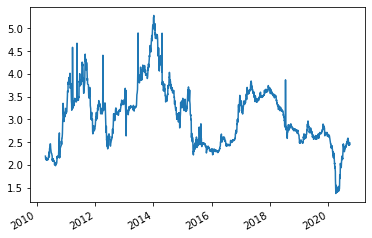

In [15]:
irs.plot()

In [20]:
# irs[RRR_time];

In [21]:
change=pd.DataFrame(index=RRR_time[RRR_time>'2010-04-19'],columns=['t1','t0','irs1','irs0'])
for one in change.index:
    t0=(irs[irs.index<one].index.max())
    irs0=irs[t0]
    if one in irs.index.tolist():
        t1=one
        irs1=irs[one]
    else:
        t1=irs[irs.index>one].index.min()
        irs1=irs[t1]

    change.loc[one]=t1,t0,irs1,irs0
change['irs_change']=change['irs1']-change['irs0']
change

,t1,t0,irs1,irs0,irs_change
公布时间,,,,,
2010-05-02,2010-05-04 00:00:00,2010-04-29 00:00:00,2.15,2.135,0.015
2010-11-10,2010-11-10 00:00:00,2010-11-09 00:00:00,2.5663,2.4466,0.1197
2010-11-19,2010-11-19 00:00:00,2010-11-18 00:00:00,2.7881,2.68,0.1081
2010-12-10,2010-12-10 00:00:00,2010-12-09 00:00:00,3.13,3.0982,0.0318
2011-01-14,2011-01-14 00:00:00,2011-01-13 00:00:00,3.25,3.2,0.05
2011-02-18,2011-02-18 00:00:00,2011-02-17 00:00:00,3.83,3.85,-0.02
2011-03-18,2011-03-18 00:00:00,2011-03-17 00:00:00,3.215,3.22,-0.005
2011-04-17,2011-04-18 00:00:00,2011-04-15 00:00:00,3.385,3.38,0.005
2011-05-12,2011-05-12 00:00:00,2011-05-11 00:00:00,3.38,3.43,-0.05


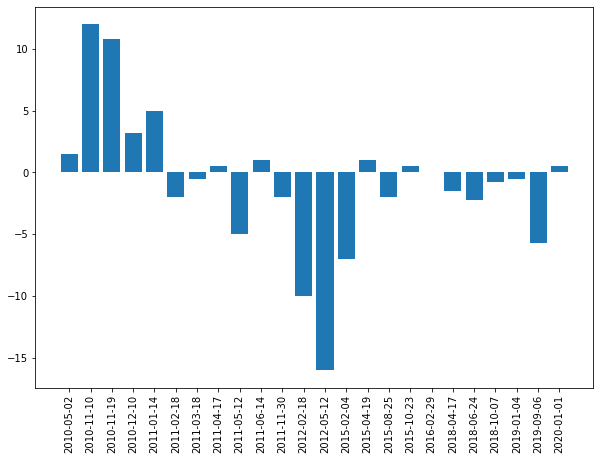

In [22]:
plt.figure(figsize=(10,7))
x_tick=list(map(lambda x:str(x)[:10],change.index.tolist()))
plt.bar(x_tick,change['irs_change']*100)
plt.xticks(rotation=90)
plt.show()

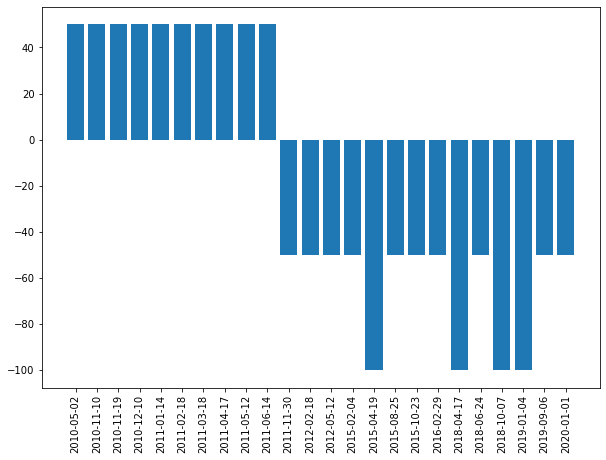

In [23]:
import re
plt.figure(figsize=(10,7))

x=df['公布时间'].apply(lambda x:re.sub('[^\x00-\xff]','-',x)[:-1])
y=df['调整幅度']
plt.bar(x,y*100)
plt.xticks(rotation=90)
plt.show()

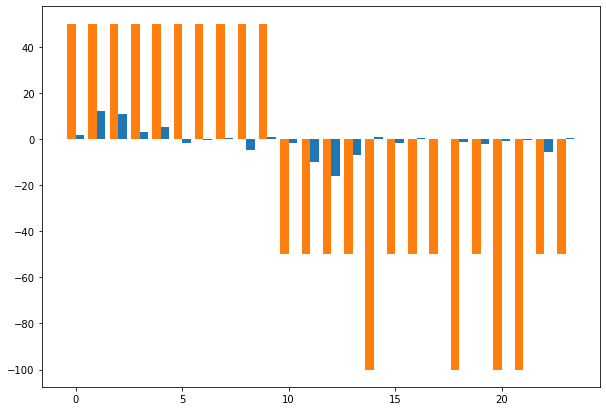

In [24]:
plt.figure(figsize=(10,7))

width=0.4

xx=np.array([i for i in range(len(x))])
x_tick=list(map(lambda x:str(x)[:10],change.index.tolist()))
plt.bar(xx+width/2,change['irs_change']*100,width=width)


y=df['调整幅度']
plt.bar(xx-width/2,y*100,width=width)

# plt.xticks(rotation=90)
plt.show()
